##Introduction

Dataset Source : https://drive.google.com/file/d/1ynGt8dOXBCMX4_6VpK0F-kS5dHVsZMD0/view?usp=sharing

Thi dataset is a 13 collumn 7006 rows

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Data_Train.csv')

df.head()

,Unnamed: 0,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,0,5274,08/07/2018,2266,17,27.4,44,1.7,2000,14.0,1.17,0.0,0.0,Yes
1,1,1185,19/01/2018,648,8,-2.5,50,1.0,1281,-11.5,0.00,0.0,0.0,Yes
2,2,6473,27/08/2018,886,16,24.7,85,1.2,1143,22.0,0.99,0.0,0.0,Yes
3,3,602,26/12/2017,127,1,-1.5,62,1.3,2000,-7.8,0.00,0.0,0.0,Yes
4,4,5656,24/07/2018,735,15,35.8,47,2.2,1029,22.7,1.51,0.0,0.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7008 non-null   int64  
 1   ID                         7008 non-null   int64  
 2   Date                       7008 non-null   object 
 3   Rented Bike Count          7008 non-null   int64  
 4   Hour                       7008 non-null   int64  
 5   Temperature(°C)            7008 non-null   float64
 6   Humidity(%)                7008 non-null   int64  
 7   Wind speed (m/s)           6833 non-null   float64
 8   Visibility (10m)           7008 non-null   int64  
 9   Dew point temperature(°C)  7008 non-null   float64
 10  Solar Radiation (MJ/m2)    7008 non-null   float64
 11  Rainfall(mm)               6833 non-null   float64
 12  Snowfall (cm)              6833 non-null   float64
 13  Functioning Day            7008 non-null   objec

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

ID                             0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             175
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                 175
Snowfall (cm)                175
Functioning Day                0
dtype: int64

In [ ]:
df.sort_values(by=['ID'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,1,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,2,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,3,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,4,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,5,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
df = df.dropna()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Functioning Day              0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
mapping = {'Yes': 1, 'No': 0}

df['Functioning Day'] = df['Functioning Day'].map(mapping)

In [ ]:
def getSeason(month, day):
    if (month == 3 and day >= 20) or (month == 4) or (month == 5) or (month == 6 and day <= 20):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8) or (month == 9 and day <= 21):
        return 'Summer'
    elif (month == 9 and day >= 22) or (month == 10) or (month == 11) or (month == 12 and day <= 20):
        return 'Fall'
    else:
        return 'Winter'

def season(row):
    return getSeason(row['month'], row['day'])

df['Season'] = df.apply(season, axis=1)

In [ ]:
import requests

holiday = 'https://www.timeanddate.com/holidays/uk/2018'

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
req = requests.get(holiday, headers=header)

holiday_df = pd.read_html(holiday)

holiday_df = holiday_df[0]
holiday_df.columns = ['Date', 'Day', 'Holiday', 'Type', 'Details']
holiday_df.drop(columns=['Details'], inplace=True)

In [ ]:
from datetime import datetime

def fixDateFormat(date):
    date = str(date)

    try:
        date = datetime.strptime(date, "%b %d")
        return date.strftime("%d %b")
    except ValueError:
        try:
            date = datetime.strptime(date, "%d %b")
            return date.strftime("%d %b")
        except ValueError:
            return None

holiday_df['Date'] = holiday_df['Date'].apply(fixDateFormat)
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'], format='%d %b', errors='coerce', dayfirst=True)

In [ ]:
df['Holiday'] = 'Normal Day'

In [ ]:
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')
holiday_df['Month_Day'] = holiday_df['Date'].dt.strftime('%m-%d')

for index, row in df.iterrows():
    month_day = row['Month_Day']
    if month_day in holiday_df['Month_Day'].values:
        holiday_name = holiday_df.loc[holiday_df['Month_Day'] == month_day, 'Holiday'].iloc[0]
        df.at[index, 'Holiday'] = 'Holiday'

df.drop(columns=['Month_Day'], inplace=True)

In [ ]:
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df = df.loc[df['Functioning Day'] == 1]

In [ ]:
df = pd.get_dummies(df, columns=['Holiday'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Season'] = LabelEncoder().fit_transform(df['Season'])

In [ ]:
x = df.drop(['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY= train_test_split(x, y, random_state=35)

def smape(actual, forecast):
    return 100*np.mean(2*np.abs(actual - forecast) / np.abs(actual) + np.abs(forecast))

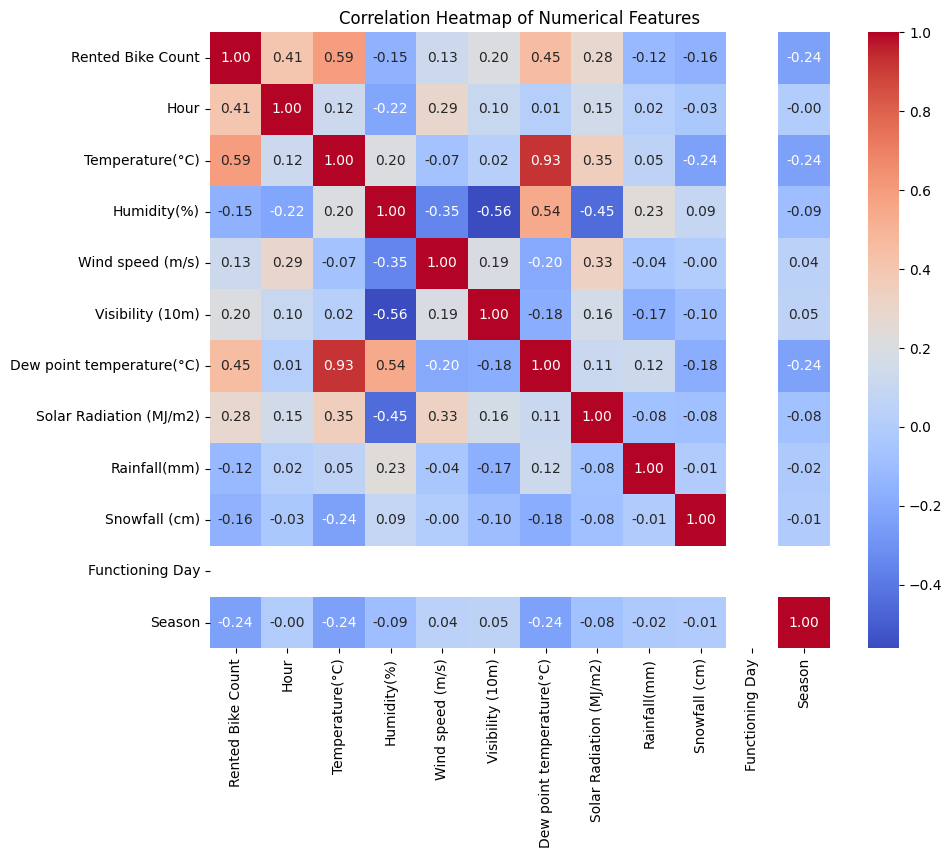

In [ ]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

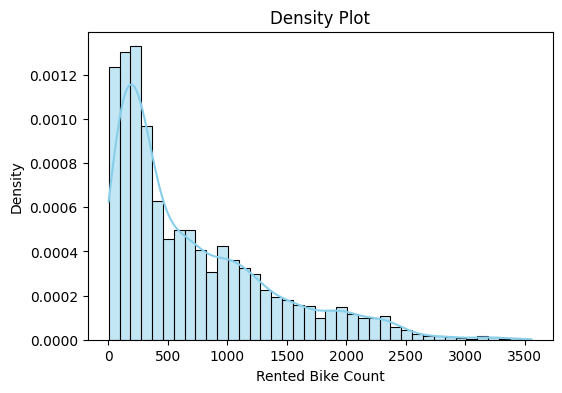

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df['Rented Bike Count'], kde=True, stat='density', color='skyblue', edgecolor='black', alpha=0.5)

plt.title('Density Plot')
plt.xlabel('Rented Bike Count')

# Show plot
plt.show()

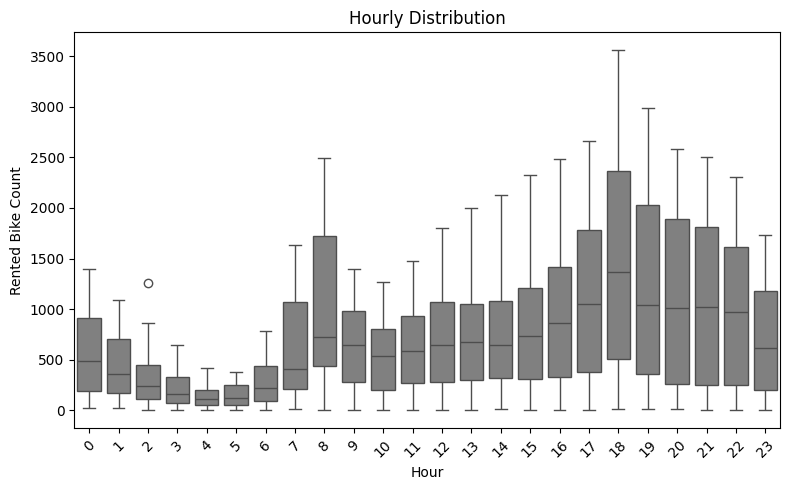

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Hour', y='Rented Bike Count', data=df, color='gray')  # Set color to gray
plt.title('Hourly Distribution')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
lr = LinearRegression()
lr.fit(trainX, trainY)
lrPredict = lr.predict(testX)
print('Linear Regression SMAPE: ', smape(testY, lrPredict))
print('Linear Regression MAE: ', mean_absolute_error(testY, lrPredict))

Linear Regression SMAPE:  71818.67585155461
Linear Regression MAE:  319.4825151486681


In [ ]:
rf = RandomForestRegressor()
rf.fit(trainX, trainY)
rfPredict = rf.predict(testX)
print('Random Forest SMAPE: ', smape(testY, rfPredict))
print('Linear Regression MAE: ', mean_absolute_error(testY, rfPredict))

Random Forest SMAPE:  68316.01998792222
Linear Regression MAE:  128.07492843808336


In [ ]:
gb = GradientBoostingRegressor()
gb.fit(trainX, trainY)
gbPredict = gb.predict(testX)
print('Gradient Boosting SMAPE: ', smape(testY, gbPredict))
print('Linear Regression MAE: ', mean_absolute_error(testY, gbPredict))

Gradient Boosting SMAPE:  68274.9007164028
Linear Regression MAE:  152.60876416493448
